In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.metrics import accuracy_score, roc_auc_score, fbeta_score, precision_score, recall_score, roc_curve

In [2]:
# Load datasets
data = pd.read_csv("data/NEO_v2_refined.csv")
data_res_adasyn = pd.read_csv("data/NEO_v2_refined_res_adasyn.csv")
data_res_smoteenn = pd.read_csv("data/NEO_v2_refined_res_smoteenn.csv")

In [3]:
# Split datastes in trining and test set
X = data.drop(columns=["hazardous", "id"])
y = data["hazardous"]

X_res_smoteenn = data_res_smoteenn.drop(columns=["hazardous"])
y_res_smoteenn = data_res_smoteenn["hazardous"]

X_res_adasyn = data_res_adasyn.drop(columns=["hazardous"])
y_res_adasyn = data_res_adasyn["hazardous"]


In [4]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.33, random_state=42)
X_train_res_smoteenn, X_test_res_smoteenn, y_train_res_smoteenn, y_test_res_smoteenn  = train_test_split (X_res_smoteenn , y_res_smoteenn , test_size=0.33, random_state=42)
X_train_res_adasyn, X_test_res_adasyn, y_train_res_adasyn, y_test_res_adasyn = train_test_split (X_res_adasyn, y_res_adasyn, test_size=0.33, random_state=42)

## Decision tree C4.5

### Original dataset

NO Cost-sensitive 

In [5]:
decision_tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
f2score_tree = fbeta_score(y_test, y_pred, beta=2)
fpr, tpr, _ = roc_curve(y_test, y_pred)

In [6]:
print("------ C4.5 Original dataset Cost-insensitive ------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F2 score:", fbeta_score(y_test, y_pred, beta=2, average="micro"), "micro", fbeta_score(y_test, y_pred, beta=2, average="macro"), "macro", fbeta_score(y_test, y_pred, beta=2, average="weighted"), "weighted")
print("ROC AUC score:", roc_auc_score(y_test, y_pred))
print("---------------------------------------------------------")

------ C4.5 Original dataset Cost-insensitive ------
Accuracy: 0.8899786495863358
Precision: 0.4416972936852656
Recall: 0.4482875551034249
F2 score: 0.8899786495863358 micro 0.6927161620532902 macro 0.8901229455988949 weighted
ROC AUC score: 0.6932302466381816
---------------------------------------------------------


In [7]:
cross_validate(decision_tree, X, y, cv=10, scoring=['f1', 'roc_auc'])

{'fit_time': array([0.4345963 , 0.52184844, 0.49326611, 0.41917181, 0.39296246,
        0.41060376, 0.43423963, 0.41725492, 0.42651892, 0.40529013]),
 'score_time': array([0.01347065, 0.01687765, 0.01078916, 0.01233935, 0.01105642,
        0.0100224 , 0.01113462, 0.01139545, 0.01064682, 0.01043177]),
 'test_f1': array([0.41763811, 0.43930636, 0.41548528, 0.4057508 , 0.46477273,
        0.44310656, 0.47808765, 0.45138889, 0.4561194 , 0.47435124]),
 'test_roc_auc': array([0.69175119, 0.699779  , 0.68080262, 0.67811969, 0.70285923,
        0.68320577, 0.70993124, 0.69290193, 0.69112128, 0.69911151])}

YES Cost-sensitive

In [8]:
decision_tree_cost = DecisionTreeClassifier(random_state=0, class_weight="balanced").fit(X_train, y_train) # Cost sensitive learning con "balanced"

y_pred = decision_tree_cost.predict(X_test)
f2score_tree_cost_learning = fbeta_score(y_test, y_pred, beta=2)
fpr_cost, tpr_cost, _ = roc_curve(y_test,  y_pred)

In [9]:
print("------ C4.5 Original dataset Cost-sensitive ------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred), y_pred)
print("F2 score:", fbeta_score(y_test, y_pred, beta=2, average="micro"), "micro", fbeta_score(y_test, y_pred, beta=2, average="macro"), "macro", fbeta_score(y_test, y_pred, beta=2, average="weighted"), "weighted")
print("ROC AUC score:", roc_auc_score(y_test, y_pred))
print("---------------------------------------------------------")

------ C4.5 Original dataset Cost-sensitive ------
Accuracy: 0.8914798505471043
Precision: 0.4463655610444601
Recall: 0.42895896914208204 [0. 0. 0. ... 0. 0. 0.]
F2 score: 0.8914798505471043 micro 0.6867384264728364 macro 0.8910894465715027 weighted
ROC AUC score: 0.685452955544512
---------------------------------------------------------


In [10]:
cross_validate(decision_tree_cost, X, y, cv=10, scoring=['f1', 'roc_auc'])

{'fit_time': array([0.43645859, 0.45620275, 0.46052623, 0.46228909, 0.41132903,
        0.43070412, 0.44559336, 0.46348786, 0.47781229, 0.45483518]),
 'score_time': array([0.01149225, 0.01098895, 0.01100707, 0.01023269, 0.00962162,
        0.01012444, 0.01099706, 0.01068997, 0.01126432, 0.01081395]),
 'test_f1': array([0.43229167, 0.40552486, 0.4115975 , 0.45407872, 0.43514151,
        0.44430919, 0.48080331, 0.45551601, 0.46489104, 0.4609619 ]),
 'test_roc_auc': array([0.69686265, 0.67349382, 0.67347064, 0.69639361, 0.68169821,
        0.68242357, 0.70568844, 0.69170366, 0.69377708, 0.68748831])}

### SMOTEENN resampling

NO Cost-sensitive 

In [11]:
decision_tree_res_smoteenn = DecisionTreeClassifier(random_state=0).fit(X_train_res_smoteenn, y_train_res_smoteenn)

y_pred_res_smoteenn = decision_tree_res_smoteenn.predict(X_test_res_smoteenn)
f2score_tree_res_smoteenn = fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2)
fpr_tree_res_smoteenn, tpr_tree_res_smoteenn, _ = roc_curve(y_test_res_smoteenn,  y_pred_res_smoteenn)

In [12]:
print("------ C4.5 resampling SMOTEENN Cost-insensitive ------")
print("Accuracy:", accuracy_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("Precision:", precision_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("Recall:", recall_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("F2 score:", fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2, average="micro"), "micro", fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2, average="macro"), "macro", fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2, average="weighted"), "weighted")
print("ROC AUC score:", roc_auc_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("---------------------------------------------------------")

------ C4.5 resampling SMOTEENN Cost-insensitive ------
Accuracy: 0.9276103521658543
Precision: 0.9227846286205907
Recall: 0.925771416241099
F2 score: 0.9276103521658543 micro 0.9275054523699052 macro 0.9276117935370962 weighted
ROC AUC score: 0.9275301832042604
---------------------------------------------------------


In [13]:
cross_validate(decision_tree_res_smoteenn, X_res_smoteenn, y_res_smoteenn, cv=10, scoring=['f1', 'roc_auc'])

{'fit_time': array([0.69470406, 0.65063167, 0.66650009, 0.63961482, 0.64674854,
        0.6402607 , 0.61040545, 0.64496469, 0.61269355, 0.61161733]),
 'score_time': array([0.0115087 , 0.01088262, 0.01040769, 0.01064229, 0.01052356,
        0.01058245, 0.01102519, 0.01042271, 0.01032114, 0.01111054]),
 'test_f1': array([0.70792709, 0.89285714, 0.9385076 , 0.9349016 , 0.94877144,
        0.94073554, 0.94261237, 0.93546132, 0.94999412, 0.95458801]),
 'test_roc_auc': array([0.75870473, 0.89764457, 0.94057505, 0.93725239, 0.95073188,
        0.94302664, 0.94487246, 0.9378051 , 0.95202769, 0.95644775])}

YES Cost-sensitive

In [14]:
decision_tree_res_smoteenn_cost = DecisionTreeClassifier(random_state=0, class_weight="balanced").fit(X_train_res_smoteenn, y_train_res_smoteenn)

y_pred_res_smoteenn = decision_tree_res_smoteenn_cost.predict(X_test_res_smoteenn)
f2score_tree_res_smoteenn_cost_learning = fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2)
fpr_tree_res_smoteenn_cost, tpr_tree_res_smoteenn_cost, _ = roc_curve(y_test_res_smoteenn,  y_pred_res_smoteenn)

In [15]:
print("------ C4.5 resampling SMOTEENN Cost-sensitive ------")
print("Accuracy:", accuracy_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("Precision:", precision_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("Recall:", recall_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("F2 score:", fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2, average="micro"), "micro", fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2, average="macro"), "macro", fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2, average="weighted"), "weighted")
print("ROC AUC score:", roc_auc_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("---------------------------------------------------------")

------ C4.5 resampling SMOTEENN Cost-sensitive ------
Accuracy: 0.9287773735154802
Precision: 0.9231539782484258
Recall: 0.928001150830756
F2 score: 0.9287773735154802 micro 0.9287026993835775 macro 0.9287790523610695 weighted
ROC AUC score: 0.9287435338554015
---------------------------------------------------------


In [16]:
cross_validate(decision_tree_res_smoteenn_cost, X_res_smoteenn, y_res_smoteenn, cv=10, scoring=['f1', 'roc_auc'])

{'fit_time': array([0.74383879, 0.7168591 , 0.78344774, 0.74486113, 0.69798303,
        0.69893813, 0.70632267, 0.71812034, 0.6948173 , 0.69617534]),
 'score_time': array([0.01057577, 0.01131153, 0.01079893, 0.0104816 , 0.01028252,
        0.01152301, 0.01044011, 0.01150036, 0.01124358, 0.01050425]),
 'test_f1': array([0.72375921, 0.89363734, 0.94400368, 0.9385566 , 0.94964029,
        0.94160328, 0.94512904, 0.93350354, 0.94812544, 0.95371669]),
 'test_roc_auc': array([0.76835389, 0.89855265, 0.94597244, 0.94083491, 0.95159068,
        0.94385544, 0.94719954, 0.93581087, 0.95024188, 0.95559877])}

### ADASYN resamble

NO Cost-sensitive


In [17]:
decision_tree_res_adasyn = DecisionTreeClassifier(random_state=0).fit(X_train_res_adasyn, y_train_res_adasyn)

y_pred_res_adasyn = decision_tree_res_adasyn.predict(X_test_res_adasyn)
f2score_tree_res_adasyn = fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2)
fpr_tree_res_adasyn, tpr_tree_res_adasyn, _ = roc_curve(y_test_res_adasyn,  y_pred_res_adasyn)

In [18]:
print("------ C4.5 resampling ADASYN Cost-insensitive ------")
print("Accuracy:", accuracy_score(y_test_res_adasyn, y_pred_res_adasyn))
print("Precision:", precision_score(y_test_res_adasyn, y_pred_res_adasyn))
print("Recall:", recall_score(y_test_res_adasyn, y_pred_res_adasyn))
print("F2 score:", fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2, average="micro"), "micro", fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2, average="macro"), "macro", fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2, average="weighted"), "weighted")
print("ROC AUC score:", roc_auc_score(y_test_res_adasyn, y_pred_res_adasyn))
print("---------------------------------------------------------")

------ C4.5 resampling ADASYN Cost-insensitive ------
Accuracy: 0.9381538796861377
Precision: 0.9375774967229957
Recall: 0.9415468905649637
F2 score: 0.9381538796861378 micro 0.9380956520012188 macro 0.9381515845239962 weighted
ROC AUC score: 0.9380808521401336
---------------------------------------------------------


In [19]:
cross_validate(decision_tree_res_adasyn, X_res_adasyn, y_res_adasyn, cv=10, scoring=['f1', 'roc_auc'])

{'fit_time': array([1.82444382, 1.77364612, 1.68410468, 1.56230426, 1.75319266,
        1.55940771, 1.56855869, 1.7545805 , 1.49711633, 1.64764023]),
 'score_time': array([0.02335477, 0.01614428, 0.01561856, 0.02375174, 0.01570773,
        0.0149138 , 0.01475954, 0.01572275, 0.01481509, 0.01523685]),
 'test_f1': array([0.48791976, 0.94757551, 0.95898113, 0.95727085, 0.96296296,
        0.96545718, 0.96357864, 0.96250939, 0.9661135 , 0.96844548]),
 'test_roc_auc': array([0.65362019, 0.94536028, 0.95665962, 0.95494032, 0.96104492,
        0.96406126, 0.96180035, 0.96073544, 0.96471163, 0.96710383])}

YES Cost-sensitive

In [20]:
decision_tree_res_adasyn_cost = DecisionTreeClassifier(random_state=0, class_weight="balanced").fit(X_train_res_adasyn, y_train_res_adasyn)

y_pred_res_adasyn = decision_tree_res_adasyn_cost.predict(X_test_res_adasyn)
f2score_tree_res_adasyn = fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2)
fpr_tree_res_adasyn_cost, tpr_tree_res_adasyn_cost, _ = roc_curve(y_test_res_adasyn,  y_pred_res_adasyn)

In [21]:
print("------ C4.5 resampling ADASYN Cost-sensitive ------")
print("Accuracy:", accuracy_score(y_test_res_adasyn, y_pred_res_adasyn))
print("Precision:", precision_score(y_test_res_adasyn, y_pred_res_adasyn))
print("Recall:", recall_score(y_test_res_adasyn, y_pred_res_adasyn))
print("F2 score:", fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2, average="micro"), "micro", fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2, average="macro"), "macro", fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2, average="weighted"), "weighted")
print("ROC AUC score:", roc_auc_score(y_test_res_adasyn, y_pred_res_adasyn))
print("---------------------------------------------------------")

------ C4.5 resampling ADASYN Cost-sensitive ------
Accuracy: 0.9376271432723046
Precision: 0.9371722182849043
Recall: 0.9409065034865519
F2 score: 0.9376271432723045 micro 0.9375705374070908 macro 0.9376250384061346 weighted
ROC AUC score: 0.9375565618219459
---------------------------------------------------------


In [22]:
cross_validate(decision_tree_res_adasyn_cost, X_res_adasyn, y_res_adasyn, cv=10, scoring=['f1', 'roc_auc'])

{'fit_time': array([1.88571119, 1.92935252, 1.80975032, 1.613271  , 1.67859983,
        1.74736261, 1.72997379, 1.71280384, 1.59552073, 1.7290206 ]),
 'score_time': array([0.01698828, 0.01886892, 0.01596451, 0.01575184, 0.01530838,
        0.01572728, 0.01572537, 0.01561999, 0.01506066, 0.01484299]),
 'test_f1': array([0.48413877, 0.9477707 , 0.95950442, 0.95774486, 0.96210551,
        0.96382609, 0.96451687, 0.96272323, 0.96593349, 0.96816838]),
 'test_roc_auc': array([0.65172408, 0.94561234, 0.95719616, 0.95541383, 0.96014249,
        0.96229703, 0.96284116, 0.96098347, 0.96453482, 0.96679687])}

## Naive Bayes

### Original dataset

In [23]:
bayes = GaussianNB().fit(X_train, y_train)

y_pred = bayes.predict(X_test)
f2score_bayes = fbeta_score(y_test, y_pred, beta=2)
fpr_bayes, tpr_bayes, _ = roc_curve(y_test,  y_pred)

In [24]:
print("------ Naive Bayes Original dataset ------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F2 score:", fbeta_score(y_test, y_pred, beta=2))
print("ROC AUC score:", roc_auc_score(y_test, y_pred))
print("---------------------------------------------------------")

------ Naive Bayes Original dataset ------
Accuracy: 0.897417934347478
Precision: 0.3102409638554217
Recall: 0.034927093930145814
F2 score: 0.0424637203166227
ROC AUC score: 0.5132270427285687
---------------------------------------------------------


In [25]:
cross_validate(bayes, X, y, cv=10, scoring=['f1', 'roc_auc'])

{'fit_time': array([0.02615261, 0.01779795, 0.01805115, 0.01628637, 0.01643658,
        0.01624084, 0.01600051, 0.01607084, 0.01757908, 0.01671743]),
 'score_time': array([0.01025105, 0.0094974 , 0.00932193, 0.00928926, 0.00904942,
        0.00919056, 0.00905895, 0.00982165, 0.00934434, 0.01043749]),
 'test_f1': array([0.07782101, 0.07017544, 0.0555005 , 0.08171206, 0.07429719,
        0.06288032, 0.06126482, 0.06281662, 0.06543967, 0.04158004]),
 'test_roc_auc': array([0.61003904, 0.64051967, 0.64195563, 0.63676498, 0.68051181,
        0.69952613, 0.67326843, 0.67957562, 0.72916311, 0.73518733])}

### SMOTEENN resampling

In [26]:
bayes_smoteen = GaussianNB().fit(X_train_res_smoteenn, y_train_res_smoteenn)

y_pred_res_smoteenn = bayes_smoteen.predict(X_test_res_smoteenn)
f2score_bayes_res_smoteenn = fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2)
fpr_bayes_smoteen, tpr_bayes_smoteen, _ = roc_curve(y_test_res_smoteenn,  y_pred_res_smoteenn)

In [27]:
print("------ Naive Bayes resampling SMOTEENN ------")
print("Accuracy:", accuracy_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("Precision:", precision_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("Recall:", recall_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("F2 score:", fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2, average="micro"), "micro", fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2, average="macro"), "macro", fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2, average="weighted"), "weighted")
print("ROC AUC score:", roc_auc_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("---------------------------------------------------------")

------ Naive Bayes resampling SMOTEENN ------
Accuracy: 0.69472094460081
Precision: 0.7077561177934467
Recall: 0.6136805006113788
F2 score: 0.69472094460081 micro 0.6904620999410102 macro 0.6931980450397981 weighted
ROC AUC score: 0.6911879622090443
---------------------------------------------------------


In [28]:
cross_validate(bayes_smoteen, X_res_smoteenn, y_res_smoteenn, cv=10, scoring=['f1', 'roc_auc'])

{'fit_time': array([0.02046013, 0.01483798, 0.01491833, 0.01458788, 0.01518679,
        0.01503396, 0.01510692, 0.01508522, 0.01503778, 0.01516557]),
 'score_time': array([0.01089549, 0.0092864 , 0.00954533, 0.00921178, 0.00950599,
        0.0095861 , 0.00932097, 0.00943112, 0.00942564, 0.0095439 ]),
 'test_f1': array([0.64591157, 0.64519302, 0.64943905, 0.63991951, 0.66291272,
        0.65857162, 0.65543215, 0.66564024, 0.67548618, 0.68082283]),
 'test_roc_auc': array([0.74033015, 0.75249088, 0.771061  , 0.7672508 , 0.79651024,
        0.80769541, 0.79029594, 0.80153011, 0.83712424, 0.8357231 ])}

### ADASYN resampling

In [29]:
bayes_adasyn = ComplementNB().fit(X_train_res_adasyn, y_train_res_adasyn)

y_pred_res_adasyn = bayes_adasyn.predict(X_test_res_adasyn)
f2score_bayes_res_adasyn = fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2)
fpr_bayes_adasyn, tpr_bayes_adasyn, _ = roc_curve(y_test_res_adasyn,  y_pred_res_adasyn)

In [30]:
print("------ Naive Bayes resampling ADASYN ------")
print("Accuracy:", accuracy_score(y_test_res_adasyn, y_pred_res_adasyn))
print("Precision:", precision_score(y_test_res_adasyn, y_pred_res_adasyn))
print("Recall:", recall_score(y_test_res_adasyn, y_pred_res_adasyn))
print("F2 score:", fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2, average="micro"), "micro", fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2, average="macro"), "macro", fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2, average="weighted"), "weighted")
print("ROC AUC score:", roc_auc_score(y_test_res_adasyn, y_pred_res_adasyn))
print("---------------------------------------------------------")

------ Naive Bayes resampling ADASYN ------
Accuracy: 0.5530187445510026
Precision: 0.5630109850531244
Recall: 0.5561406005407713
F2 score: 0.5530187445510026 micro 0.5529338951151352 macro 0.5530301263877263 weighted
ROC AUC score: 0.5529515530535236
---------------------------------------------------------


In [31]:
cross_validate(bayes_adasyn, X_res_adasyn, y_res_adasyn, cv=10, scoring=['f1', 'roc_auc'])

{'fit_time': array([0.0249474 , 0.02742076, 0.0270474 , 0.02722359, 0.02717805,
        0.02746058, 0.02801061, 0.0285995 , 0.02668834, 0.02700448]),
 'score_time': array([0.0138588 , 0.01341081, 0.01278877, 0.01371765, 0.01277566,
        0.01302719, 0.0128293 , 0.01254773, 0.01315546, 0.01268673]),
 'test_f1': array([0.59510104, 0.56685884, 0.57833948, 0.55067691, 0.56713237,
        0.54524294, 0.54440109, 0.56100141, 0.53228897, 0.53927289]),
 'test_roc_auc': array([0.60789079, 0.58611016, 0.5873674 , 0.56125676, 0.5643585 ,
        0.53326101, 0.54072338, 0.55334378, 0.50430803, 0.50998424])}

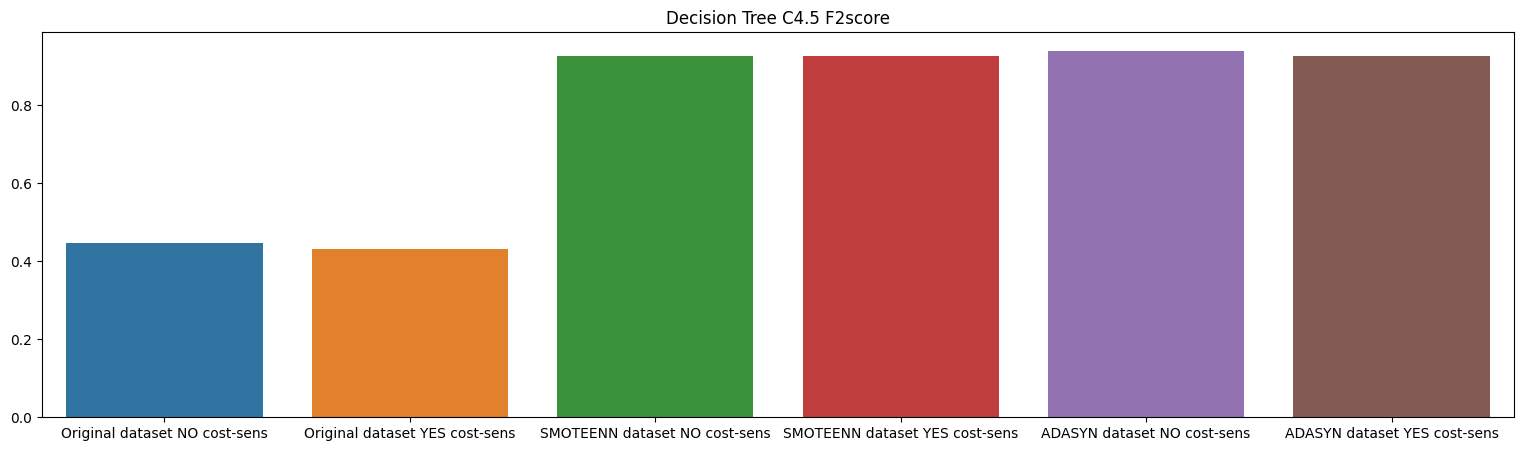

In [32]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(19, 5))
plt.title("Decision Tree C4.5 F2score")
sns.barplot(x=["Original dataset NO cost-sens", "Original dataset YES cost-sens", "SMOTEENN dataset NO cost-sens", "SMOTEENN dataset YES cost-sens", "ADASYN dataset NO cost-sens", "ADASYN dataset YES cost-sens"], y=[f2score_tree, f2score_tree_cost_learning, f2score_tree_res_smoteenn, f2score_tree_res_smoteenn_cost_learning, f2score_tree_res_adasyn,f2score_tree_res_smoteenn_cost_learning])
plt.show()

<AxesSubplot:title={'center':'Naive Bayes F2score Cost'}>

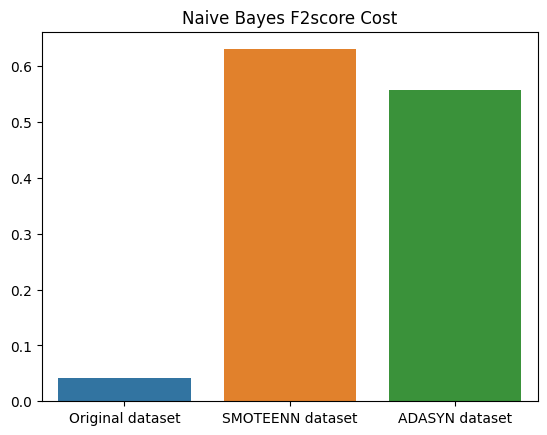

In [33]:
plt.title("Naive Bayes F2score Cost")
sns.barplot(x=["Original dataset", "SMOTEENN dataset","ADASYN dataset"], y=[f2score_bayes, f2score_bayes_res_smoteenn, f2score_bayes_res_adasyn])

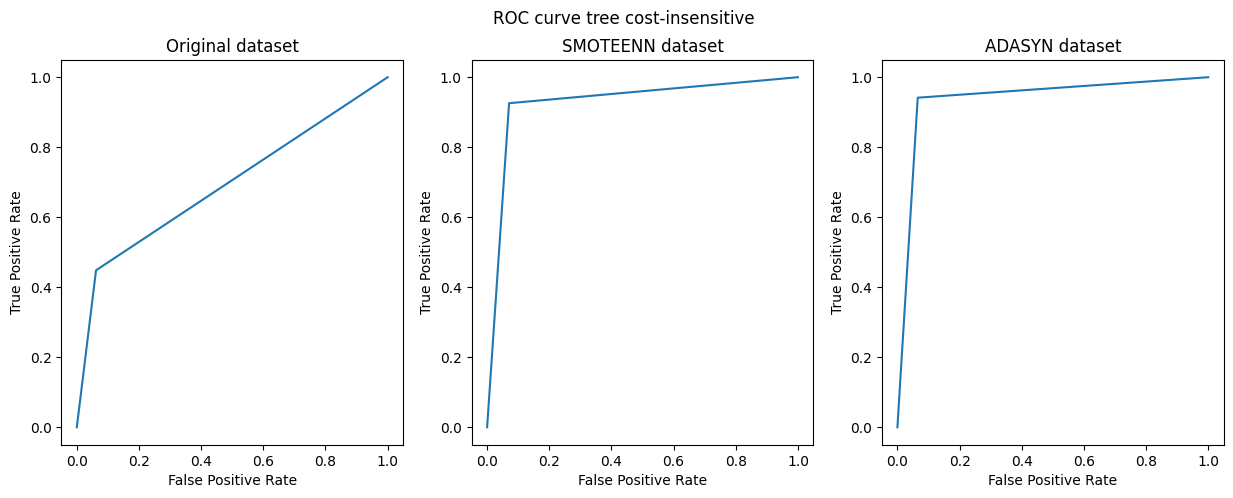

In [34]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ROC curve tree cost-insensitive')
#create ROC curve
axs[0].set_title("Original dataset")
axs[0].plot(fpr,tpr,label="Original dataset")
axs[1].set_title("SMOTEENN dataset")
axs[1].plot(fpr_tree_res_smoteenn,tpr_tree_res_smoteenn,label="Original dataset")
axs[2].set_title("ADASYN dataset")
axs[2].plot(fpr_tree_res_adasyn,tpr_tree_res_adasyn,label="Original dataset")

for ax in axs.flat:
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')

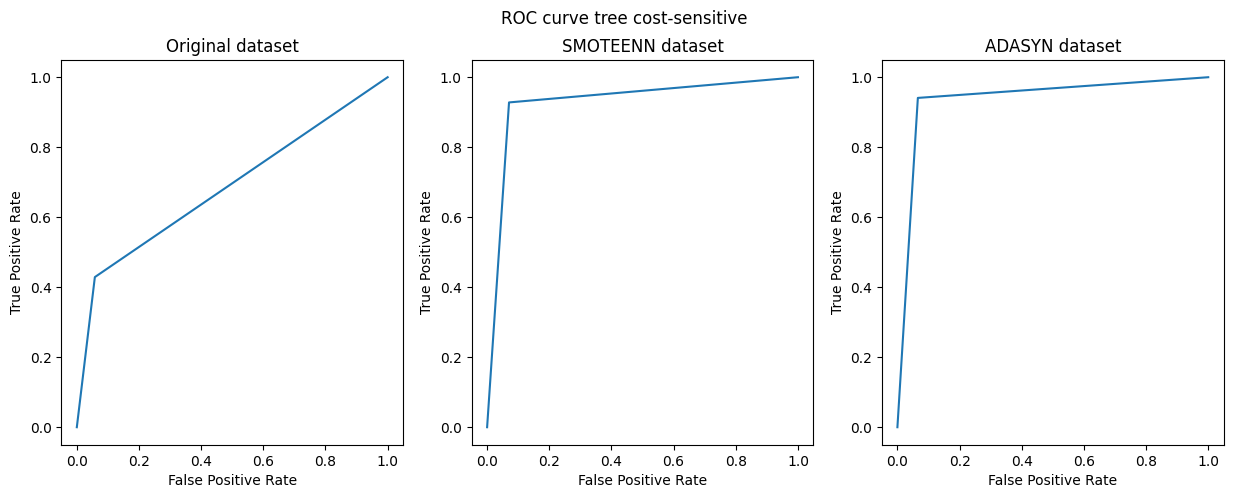

In [35]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ROC curve tree cost-sensitive')
#create ROC curve
axs[0].set_title("Original dataset")
axs[0].plot(fpr_cost,tpr_cost,label="Original dataset")
axs[1].set_title("SMOTEENN dataset")
axs[1].plot(fpr_tree_res_smoteenn_cost,tpr_tree_res_smoteenn_cost,label="Original dataset")
axs[2].set_title("ADASYN dataset")
axs[2].plot(fpr_tree_res_adasyn_cost,tpr_tree_res_adasyn_cost,label="Original dataset")

for ax in axs.flat:
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')

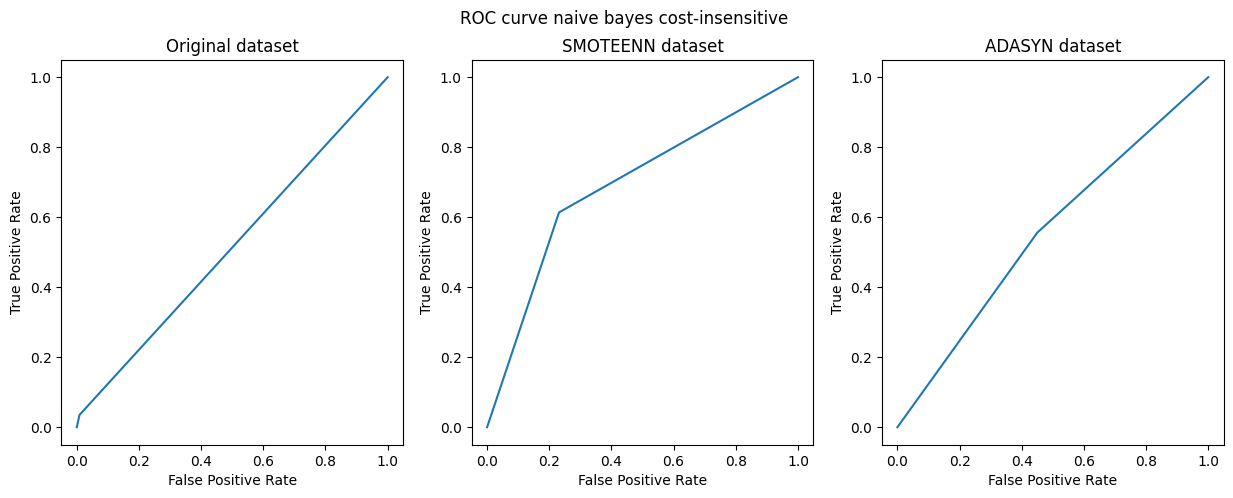

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ROC curve naive bayes cost-insensitive')
#create ROC curve
axs[0].set_title("Original dataset")
axs[0].plot(fpr_bayes,tpr_bayes,label="Original dataset")
axs[1].set_title("SMOTEENN dataset")
axs[1].plot(fpr_bayes_smoteen,tpr_bayes_smoteen,label="Original dataset")
axs[2].set_title("ADASYN dataset")
axs[2].plot(fpr_bayes_adasyn,tpr_bayes_adasyn,label="Original dataset")

for ax in axs.flat:
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')